# Obtenção e manipulação de dados históricos do mercado financeiro
> Demonstra-se o uso do módulo yfinance para o acesso a dados históricos do mercado financeiro, bem como o módulo mplfinance, para a sua representação gráfica.

- toc: true
- badges: true
- comments: true
- author: Felipe N. Schuch
- image: images/mplfinance.png
- categories: [Matemática Financeira, Variados, Pandas, Matplotlib]

# Introdução

A análise de dados históricos do mercado financeiro pode ser prática para diversos fins, como estudos acadêmicos, gerenciamento de portifólio, criação de conteúdo e outros.

Boa parte dos materiais por aí são baseados naqueles famosos aplicativos de planilha, nada contra, mas eu gosto mesmo de resolver os problemas propostos usando Python. Para isso, vamos usar dois pacotes:

* [yfinance](https://github.com/ranaroussi/yfinance) oferece uma alternativa em Python para baixar dados históricos do mercado financeiro a partir do Yahoo! finanças;

* [mplfinance](https://github.com/matplotlib/mplfinance) é uma utilidade construida sobre Matplotlib, que oferece visualização e análise para dados financeiros.

Lembre-se sempre que lucros passados não são garantia de lucros futuros, e que esse post não é uma recomendação de compra.

O primeiro passo é instalar os pacatos que usaremos, e isso pode ser feito no ambiente Jypiter (como esse post) com o seguinte comando mágico:

In [1]:
!pip install -q yfinance mplfinance

E então importamos ambos para a nossa aplicação:

In [2]:
import yfinance as yf
import mplfinance as mpf

In [3]:
#hide

# Esse bloco modifica alguns dos valores padrões para
# apresentação das figuras

import matplotlib.pyplot as plt

plt.rcdefaults()

# https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
plt.style.use('ggplot')

# https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html
plt.rcParams.update({'figure.dpi' : 100,
                     "figure.figsize" : (6, 6),
                     "axes.formatter.limits" : (-8, 8)
                    })

## Obteção e manipulação dos dados

O módulo `Ticker` nos permite o acesso a diversos dados de maneira integrada ao Python, e apenas para exemplificar, usaremos a Microsoft, código de negociação MSFT:

In [4]:
msft = yf.Ticker("MSFT")

Informações completas da companhia são obtidos com o método `info`, como segue:

In [5]:
#hide_output
msft.info

{'zip': '98052',
 'sector': 'Technology',
 'fullTimeEmployees': 144000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); and Skype, Outlook.com, and OneDrive. It also provides LinkedIn that includes Talent and marketing solutions, and subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also provides support services and Microsoft consulting services 

Pode-se obter informações sobre os principais acionistas:

In [6]:
msft.major_holders

,0,1
0,1.42%,% of Shares Held by All Insider
1,74.09%,% of Shares Held by Institutions
2,75.16%,% of Float Held by Institutions
3,4630,Number of Institutions Holding Shares


In [7]:
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",640172572,2020-03-30,0.0844,100961616330
1,Blackrock Inc.,517578906,2020-03-30,0.0683,81627369265
2,State Street Corporation,314771248,2020-03-30,0.0415,49642573522
3,"FMR, LLC",237892832,2020-03-30,0.0314,37518078534
4,Price (T.Rowe) Associates Inc,172056401,2020-03-30,0.0227,27135015001
5,Capital World Investors,139116236,2020-03-30,0.0183,21940021579
6,"Geode Capital Management, LLC",115684966,2020-03-30,0.0153,18244675987
7,Capital International Investors,103523946,2020-03-30,0.0137,16326761523
8,Capital Research Global Investors,93247848,2020-03-30,0.0123,14706118108
9,Northern Trust Corporation,92119080,2020-03-30,0.0121,14528100106


Os dados históricos são obtidos com o método `history()`, que aceita como argumentos o período desejado, ou datas de início e fim, e retorna um Pandas `DataFrame` contendo os preços de abertura e fechamento do mercado, além de máximas e mínimas, o volume de negociação e informações sobre dividendos pagos e desdobramentos.

In [8]:
data = msft.history(period="max")

E assim, temos a disposição todos os métodos inerentes do Pandas, como `head()`, que nos mostra a parte superior da tabela de dados:

In [9]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.06,0.06,0.06,0.06,1031788800,0.0,0.0
1986-03-14,0.06,0.07,0.06,0.06,308160000,0.0,0.0
1986-03-17,0.06,0.07,0.06,0.07,133171200,0.0,0.0
1986-03-18,0.07,0.07,0.06,0.06,67766400,0.0,0.0
1986-03-19,0.06,0.06,0.06,0.06,47894400,0.0,0.0


Ou `tail()`, que mostra a parte inferior:

In [10]:
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-05-15,178.56,186.54,176.51,182.65,46610400,0.00,0.0
2020-05-18,185.23,185.68,183.45,184.40,35306600,0.00,0.0
2020-05-19,184.52,186.08,182.98,183.12,26799100,0.00,0.0
2020-05-20,184.81,185.85,183.94,185.66,31230600,0.51,0.0
2020-05-21,185.40,186.67,185.40,185.68,3887105,0.00,0.0


Podemos graficar facilmente com o método `plot()`, conforme segue:

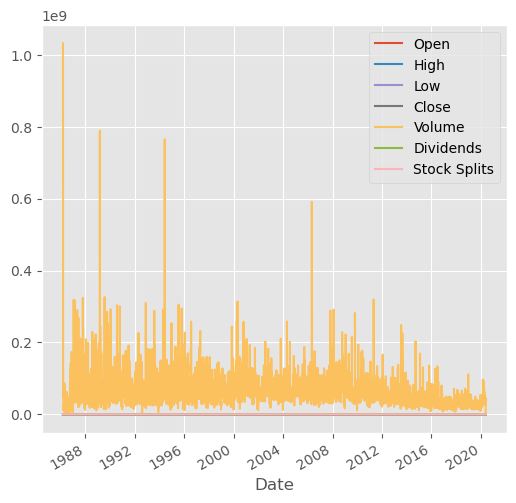

In [11]:
data.plot();

Essa figura ficou meio poluída visualmente, vamos nos concentrar apenas no preço de fechamento, e acrescentar algumas opções extras:

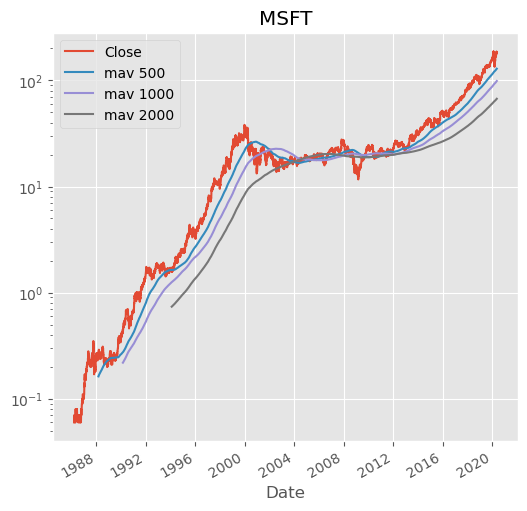

In [12]:
# Acessamos apenas o preço de fechamento, plotamos com log no eixo y,
# porque é mais representativo, adicionamos um título à figura
data.Close.plot(logy=True, title=msft.info['symbol'])

# Aqui adicionamos mádias móveis, porque não?
# mav vem do inglês para moving average
for mav in [500, 1000, 2000]:
  data.Close.rolling(mav).mean().plot(label=f'mav {mav}')

plt.legend();

Podemos também calcular e graficar a variação percentual diária do preço como:

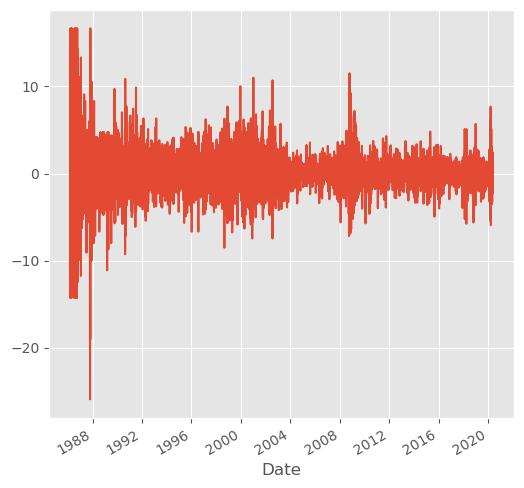

In [13]:
data['Var [%]'] = 100. * (data.Close - data.Open) / data.Open

data['Var [%]'].plot();

Que pode ser exibida como um histograma de frequências:

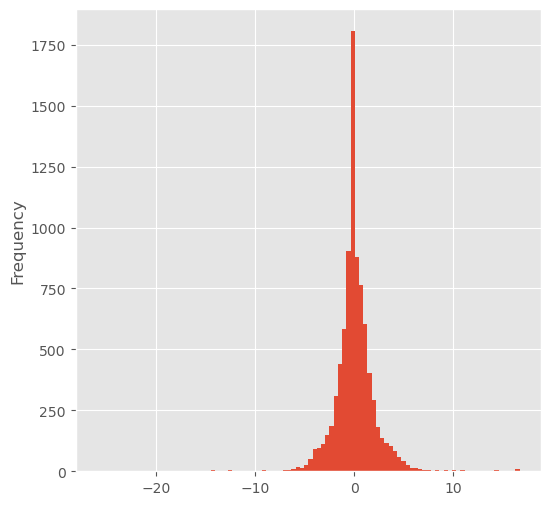

In [14]:
data['Var [%]'].plot.hist(bins=100);

Temos ainda o método `actions()` que retorna dados históricos sobre paramento de dividendos e desdobramento das ações:

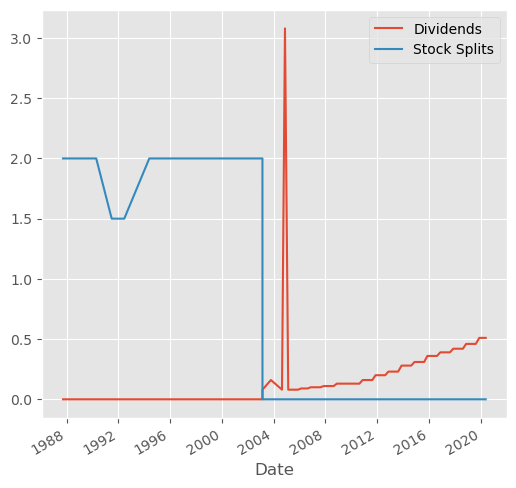

In [15]:
msft.actions.plot();

O método `describe()` é particularmente útil para ter uma rápida representação de uma grande quantidade de dados, fornecendo a contagem, média, desvio padrão, valor mínimo, máximo e outros.

In [16]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Var [%]
count,8619.000000,8619.000000,8619.000000,8619.000000,8.619000e+03,8619.000000,8619.000000,8619.000000
mean,24.861748,25.121998,24.595431,24.867282,6.031414e+07,0.002163,0.001972,0.073321
std,31.701851,32.006915,31.370856,31.709305,3.878426e+07,0.040861,0.061378,2.072611
min,0.060000,0.060000,0.060000,0.060000,2.304000e+06,0.000000,0.000000,-25.925926
25%,2.250000,2.280000,2.230000,2.245000,3.651800e+07,0.000000,0.000000,-0.775194
50%,18.460000,18.690000,18.240000,18.450000,5.351270e+07,0.000000,0.000000,0.000000
75%,25.750000,26.000000,25.390000,25.685000,7.398740e+07,0.000000,0.000000,0.896089
max,189.600000,189.650000,185.950000,187.660000,1.031789e+09,3.080000,2.000000,16.666667


Esse foi nosso exemplo, informações complementares podem ser encontradas no [post](https://aroussi.com/post/python-yahoo-finance) do autor original do pacote `yfinance`. Experimente executar esse notebook para outros códigos de negociação, por exemplo com o íncide [S&P 500](https://pt.wikipedia.org/wiki/S%26P_500) com o ticker `^GSPC`, o índice [Ibovespa](http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/ibovespa.htm) com o ticker `^BVSP`, ou empresas brasileiras, como o ticker `ITUB3.SA`, e muitos outros.

## Visualização

A representação gráfica de dados financeiros é mais usual pelo método [Candlestick](https://pt.wikipedia.org/wiki/Candlestick), onde exibe-se os preços de abertura, fechamento, máximo e mínimo de maneira mais compreensiva.

Vamos mudar os dados empregados apenas para ter um segundo exemplo da utilização do `yfinance`, agora especificando uma data de início e fim para a série histórica, e agrupando os resultados no período de uma semana.

In [17]:
data = yf.Ticker('^BVSP').history(start='2019-01-01', end='2019-12-31', interval='1wk')

E agora com `mplfinance` e apenas uma linha de código, temos a nossa figura:

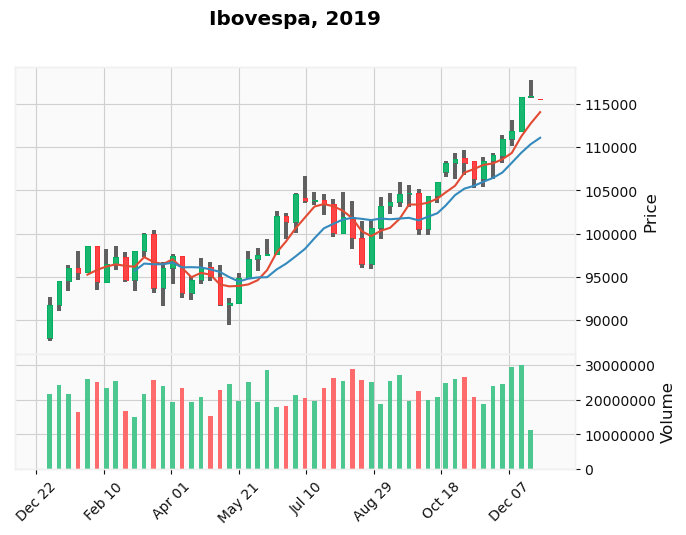

In [18]:
mpf.plot(data, type='candle',
         mav=(5,10), volume=True,
         show_nontrading=True, style='yahoo',
         title='Ibovespa, 2019');

Bem mais limpa visualmente do que a nossa primeira tentativa, não é mesmo? Perceba que o método aceita diferentes tipos de gráfico, a inclusão de médias móveis, o volume de negociações, pode mostrar, ou não, os dias em que não houveram pregão, e pode-se escolher o estilo do gráfico. Informações compleas estão disponíveis no [link](https://pypi.org/project/mplfinance/).